# **Wave Equation 1D: Centered Finite Differences**

The one-dimensional wave equation appears as follows:

$$\frac{\partial^2 u}{\partial x^2} (x,y) = \frac {1}{c^2}\frac{\partial^2 u}{\partial t^2}$$

Here, $c^2$ represents the speed at which the wave disturbance propagates in the medium.

Now, let's discretize the equation so that it can be solved using the finite difference method. This yields:

$$\frac {w_{i, j+1} - 2w_{i,j} + w_{i,j-1}}{(Δt)^2} = c^2 [\frac {w_{i+1, j} - 2w_{i,j} + w_{i-1,j}}{(Δx)^2}]$$

Solving for $w_{i,j+1}$ (corresponding to the next time step), we get:


$$w_{i,j+1} = (\frac {c Δt}{Δx})^2 [w_{i+1,j} - 2w_{i,j} + w_{i-1, j}] + 2w_{i,j} - w_{i,j-1}$$


Let´s denote $\gamma = \frac {c Δt}{Δx}$. The equation can then be expressed as:

$$w_{i,j+1} = \gamma^2 [w_{i+1,j} - 2w_{i,j} + w_{i-1, j}] + 2w_{i,j} - w_{i,j-1}$$


Further simplifying:

---
$$w_{i,j+1} = \gamma^2w_{i+1,j} - 2w_{i,j}(1-\gamma^2) + \gamma^2 w_{i-1, j} - w_{i,j-1}$$
---

However, as evident from the equation, two ghost points exist for both time and space, let's explore why:

![](https://i.imgur.com/nivEPh5.jpg)

For time $j = 0$, or, $w_{i,-1}$ we have:

$$w_{i,-1} = w_{i,1} - 2 Δt q_{i}$$

Where $q_{i}$ represents $\frac {\partial u }{\partial t}$ evaluated $t=0$

Solving for the time step $w_{i,1}$ yields:

$$w_{i,1} = \frac {\gamma_{i}^2}{2} w_{i-1,0} + (1-\gamma_{i}^2) w_{i,0} + \frac {\gamma_{i}^2}{2} w_{i+1,0} + q_{i} Δt$$

We will calculate this position separately from the complete function computation. In other words, we will compute it separately and then add it to the rest of the calculation for ease of implementation.

Now, let's examine the code:

Let's remember that the value of gamma depends on the steps in space, time, and velocity. For the convenience of this code, the gamma value will be a number provided by the user that **must be less than one** for the code to function correctly and not be compromised as time progresses.

The suer can laso change the $p(x)$ initial condition and $q(x)$ the initial value of the time derivative.

This is:plementation.

Now, let's examine the code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate
import sympy as sp
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
t = 10
L = 4.0
c = 1.0

gamma = 0.1
print(f"The gamma value is: {gamma}")

# Initial Conditions
xc = L/2
p = lambda x: np.exp(-(x-xc)**2)
q = lambda x: 1 / ((x-xc)**2 +1 )

The gamma value is: 0.1


In [3]:
x = np.linspace(0, L, 101)
time = np.linspace(0, t, 1000)
dt = 1e-3
nx = len(x); nt = len(time)

# Matrix 
w = np.zeros((nx, nt))

# Initial Condtion
for i in range(1, len(x)-1):
  w[i, 0] = p(x[i])

# Boundary Conditions
for j in range(nt):
  w[0, j] = 0
  w[nx-1, j] = 0

# Step 1
for i in range(1, nx-1):
    w[i, 1] = ( (0.5 * (gamma**2) * p(x[i-1])) + (1.0-gamma**2) * p(x[i]) + 0.5 * ((gamma**2) * p(x[i+1]) + q(x[i]) * dt))

# Time calculation for all time steps
for j in range(1, nt-1):
  for i in range(1, nx-1):
    w[i, j+1] = (w[i-1, j] * gamma**2 + 2 * (1-gamma**2) * w[i, j] + w[i+1, j] * gamma**2 -w[i, j-1])

<function matplotlib.pyplot.show(close=None, block=None)>

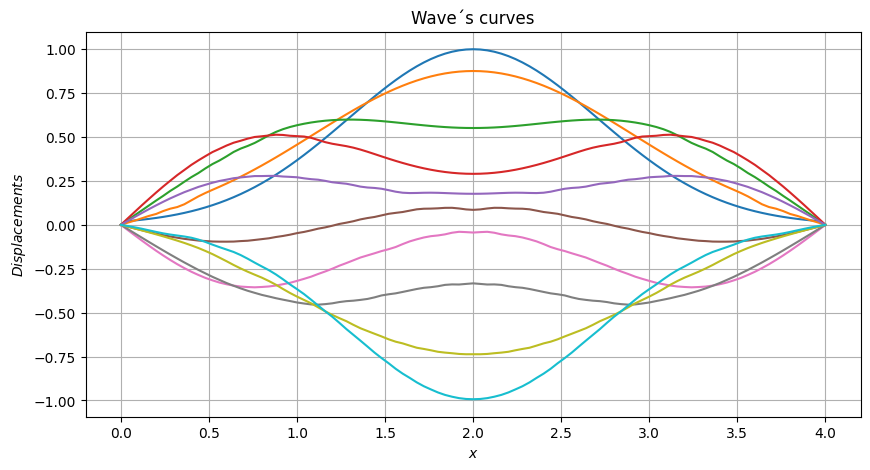

In [4]:
paramns={"legend.fontsize":5,"legend.handlength":1}
plt.figure(figsize=(10, 5))

ndt=110
plt.xlabel(r"$x$")
plt.ylabel(r"$Displacements$")
plt.title(r"Wave´s curves")
X=np.linspace(0, 4, w.shape[0])
for j in range(0, nt, ndt):
  t=j*dt
  plt.plot(X,w[:,j])
plt.grid(True)
plt.show

### **3D Graph**

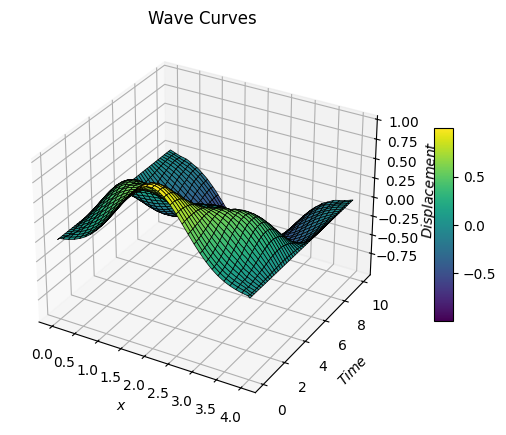

In [5]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

# Parameters for 3D plot
X, T = np.meshgrid(x, time)

# Plot the 3D surface
surf = ax.plot_surface(X, T, w.T, cmap='viridis', edgecolor='k', linewidth=0.5)

# Set labels and title
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$Time$")
ax.set_zlabel(r"$Displacement$")
ax.set_title(r"Wave Curves")

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.show()

---

The above code shows the wave equation with a Gaussian pulse calculated using centered finite differences. The code we will present next will be similar, but the finite differences will be only forward, with the addition of a friction coefficient that will slow down the wave propagation after a certain time. In this section, we will have a 2D animation that depends on the parameters passed to the function. As mentioned in other documentation, the link to the Google Colab notebook will be provided for this. Now, let's see how the calculation of the wave equation looks with these forward finite differences.

# **Wave Equation 1D: Forward Finite Differences**

The objective will be to model the motion of a wave in one dimension based on the theoretical foundation of the wave equation:

$$ \frac{\partial^2y}{\partial x^2} = \frac{1}{c^2}\frac{\partial^2y}{\partial t^2} \\ $$


$$ \\ r = \frac{c \Delta t}{\Delta x} \\ $$

Finite Differences:

$$ \\ y_{i,n+1} = 2y_{i,n}\left( 1-r^2 \right) + (y_{i+1,n} + y_{i-1,n})r^2 - y_{i,n-1}  $$


Solving for $y_{i,n-1}$ of velocity, substituting into Equation (1), and carrying out the algebraic development, we have:

$$ y_{i,n+1} = y_{i,n}\left( 1-r^2 \right) + \frac{1}{2}(y_{i+1,n} + y_{i-1,n})r^2 + v_{i,n}\Delta t $$

This last equation will be the equation to model in order to obtain the state of the string at each moment and achieve the animation for a string that does not experience friction.

Now, for the string to experience friction, after performing the respective algebraic operations, we have the following function to model:

$$ y_{i,n+1} = y_{i,n}\left( 1-r^2 \right) + \frac{1}{2}(y_{i+1,n} + y_{i-1,n})r^2 + v_{i,n} \left( \Delta t - \frac{\theta}{2} \right) $$

Where $\theta = \frac{(\Delta t)^2 2k}{\rho}$, siendo $k, \rho$ parameters for damping the motion as time progresses. It is worth noting that if you want to visualize the motion ignoring friction effects, simply set $\theta = 0$.
Let's move on to the code development, starting by importing the necessary libraries:

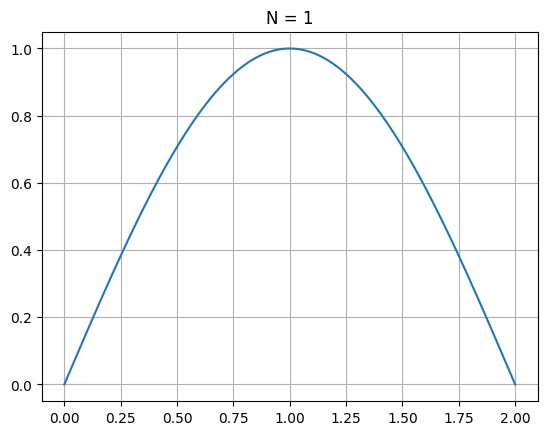

In [6]:
# Parameters of the problem

L = 2 # Length of the string
c = 1 # Wave velocity
dx = 0.01 # Step size in x
dt = 0.005 # Step size in t
t_max = 3 # Maximum time


def Onda(L, c, dx, dt, n, t_max):
  x = np.arange(0, L+dx, dx)
  t = np.arange(0, t_max+dt, dt)
  nx = len(x)
  nt = len(t)
  r = c*dt/dx

  # Initial Conditions
  u = np.zeros((nt, nx))
  u[0,:] = np.sin(n*np.pi*x/L)
  u[:,0] = 0
  u[:,-1] = 0
  for i in range(1, nt):
      for j in range(1, nx-1):
          u[i,j] = 2*u[i-1,j] - u[i-2,j] + r**2 * (u[i-1,j+1] - 2*u[i-1,j] + u[i-1,j-1])
  return x,u

# Solution Graph
x, u=  Onda(L, c, dx, dt, 1, t_max)
fig, ax = plt.subplots()
ax.plot(x, u[0, :], label='t=0')
plt.title("N = 1")
plt.grid("---")

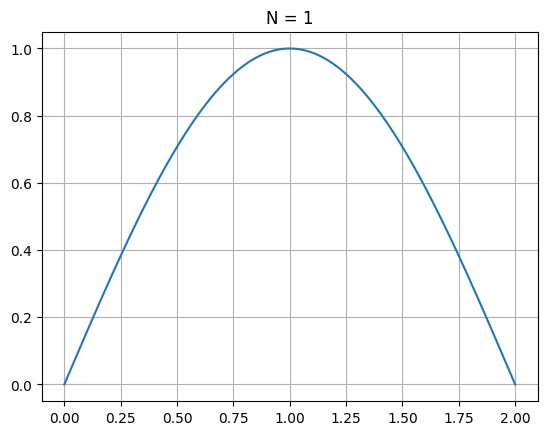

In [7]:
# Parameters of the problem

L = 2 # Length of the string
c = 1 # Wave velocity
dx = 0.01 # Step size in x
dt = 0.005 # Step size in t
t_max = 3 # Maximum time


def Onda(L, c, dx, dt, n, t_max):
  x = np.arange(0, L+dx, dx)
  t = np.arange(0, t_max+dt, dt)
  nx = len(x)
  nt = len(t)
  r = c*dt/dx

  # Initial Conditions
  u = np.zeros((nt, nx))
  u[0,:] = np.sin(n*np.pi*x/L)
  u[:,0] = 0
  u[:,-1] = 0
  for i in range(1, nt):
      for j in range(1, nx-1):
          u[i,j] = 2*u[i-1,j] - u[i-2,j] + r**2 * (u[i-1,j+1] - 2*u[i-1,j] + u[i-1,j-1])
  return x,u

# Solution Graph
x, u=  Onda(L, c, dx, dt, 1, t_max)
fig, ax = plt.subplots()
ax.plot(x, u[0, :], label='t=0')
plt.title("N = 1")
plt.grid("---")

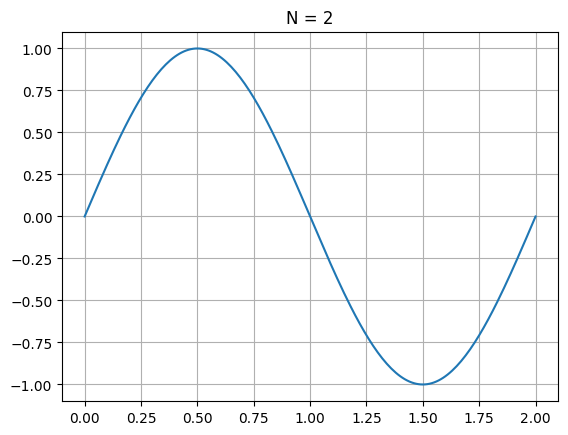

In [8]:
x, u=Onda(L, c, dx, dt, 2, t_max)
fig, ax = plt.subplots()
ax.plot(x, u[0, :], label='t = 0')
plt.title("N = 2")
plt.grid("---")

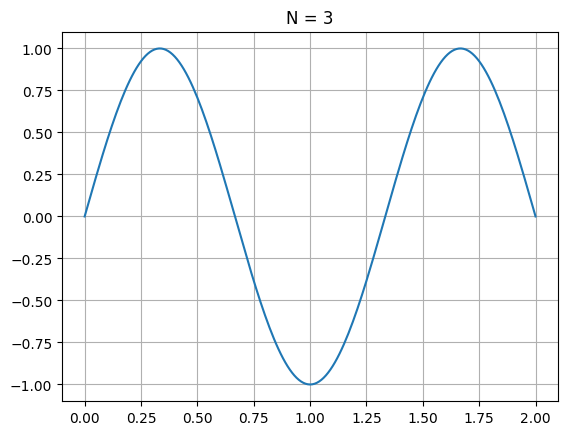

In [9]:
x, u = Onda(L,c,dx,dt,3,t_max)
fig, ax = plt.subplots()
ax.plot(x, u[0,:], label='t=0')
plt.title("N = 3")
plt.grid("---")

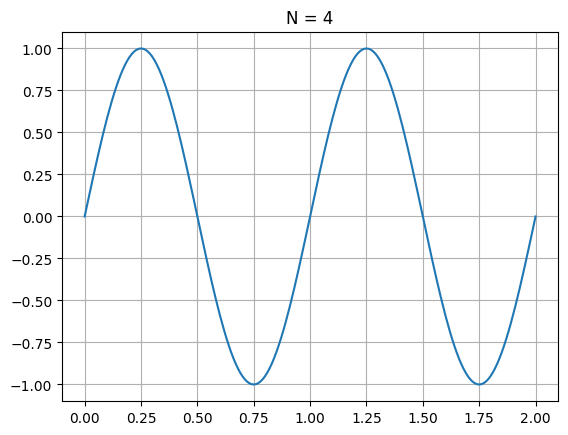

In [10]:
x, u = Onda(L, c, dx, dt, 4, t_max)
fig, ax = plt.subplots()
ax.plot(x, u[0,:], label='t=0')
plt.title("N = 4")
plt.grid("---")

## **Animation Wave Equation 1D: Gaussian Pulse**

Let's look at the code implementation to generate the motion of the wave for the established initial configuration, creating three main functions: The `init()` function, which will have the initial state of the string, the `change()` function, which will contain the main loop of operations to find the subsequent states of the string using Equation (3), and the animate() function, which will be responsible for executing the animation. Once the animation is ready, we proceed to visualize it, thus the motion of the string is:

The animation shows a gaussian pulse as an initial condition, but the graphs 2D showed before, where made by the initial condition $sin(\frac{\pi x}{L})$. This is:

In [11]:
fig = plt.figure(figsize=(15,4))
ax = plt.axes(xlim=(0.0, 8.0),
              ylim=(-0.9, 0.9))

x = np.linspace(0.0, 8.0, 500)
y = norm.pdf(x, loc=3.5, scale=0.5)

line, = ax.plot([], [], lw=2)

def init():
  x = np.linspace(0.0, 8.0, 500)
  y = norm.pdf(x, loc=3.5, scale=0.5)
  line.set_data([x], [y])
  return line,

def change(y, vy, f, x_):
  k = 0.02; rho = 1
  t=0; dt=0.1; r=1; theta = dt**2*2*k/rho
  while t < f:
    i=1; ynext = [0]
    while i<len(x_)-1:
      ynext.append( y[i]*(1-r**2) + 0.5*r**2*(y[i+1] + y[i-1]) + vy[i]*(dt - theta/2) )
      i+=1
    ynext.append(0)
    vy = (1/dt)*(np.array(ynext) - y); y = ynext
    t+=0.1
  return y

def animate(f):
  x = np.linspace(0.0, 8.0, 500)
  y = norm.pdf(x, loc=3.5, scale=0.5)
  y_up = change(y, np.zeros(500), f, x)
  line.set_data(x, y_up)
  return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=150,
                               interval=20, blit=True)

plt.close(anim._fig)

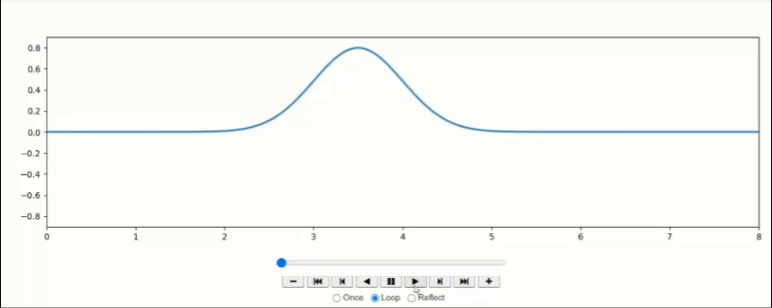

---

We add in **[here](https://colab.research.google.com/drive/1h6QkmLU7GdIJUSeaJReaIA5PG8Gmh6Yo)** a link to a Google Colab that has a bit of interface and/or interaction with the user and allows you to modify the initial values ​​of the graphs or directly play with the code. We hope you really use it because that´s the way where you would be able to use it for the specific values of your problem. 

The interactive animation will be embedded in the Google Colab link that we have provided in this section, as Jupyter books often encounter issues displaying any kind of animation. We hope you can understand and still enjoy the documentation

Have Fun!! :)))